![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción de gasto por deterioro en las sociedades fiduciarias**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

In [60]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

In [61]:
file_path = 'https://raw.githubusercontent.com/LordOnion88/MAD/refs/heads/main/Series%20de%20Tiempo/Proyecto/base%20ajustada.csv'
df = pd.read_csv(file_path)
df

,FECHA_CORTE,Ingresos,Deterioro
0,31/01/2016,12556235614,456212289
1,29/02/2016,11948803346,426440399
2,31/03/2016,12124055034,507291741
3,30/04/2016,12268361877,132621564
4,31/05/2016,22885166819,488187217
...,...,...,...
99,30/04/2024,27195720063,11441164891
100,31/05/2024,23126998775,86331878
101,30/06/2024,29758712102,95378649
102,31/07/2024,36122438899,113647065


In [62]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA_CORTE  104 non-null    object
 1   Ingresos     104 non-null    int64 
 2   Deterioro    104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [63]:
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])

In [64]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['FECHA_CORTE'] # Definir la columna fecha como index
df.drop(columns=['FECHA_CORTE'],inplace=True) # Eliminar la columna fecha
df

,Ingresos,Deterioro
FECHA_CORTE,,
2016-01-31,12556235614,456212289
2016-02-29,11948803346,426440399
2016-03-31,12124055034,507291741
2016-04-30,12268361877,132621564
2016-05-31,22885166819,488187217
...,...,...
2024-04-30,27195720063,11441164891
2024-05-31,23126998775,86331878
2024-06-30,29758712102,95378649


In [65]:
df_gasto = df.copy()
df_gasto = df_gasto.drop(['Ingresos'], axis = 1)
df_gasto

,Deterioro
FECHA_CORTE,
2016-01-31,456212289
2016-02-29,426440399
2016-03-31,507291741
2016-04-30,132621564
2016-05-31,488187217
...,...
2024-04-30,11441164891
2024-05-31,86331878
2024-06-30,95378649


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

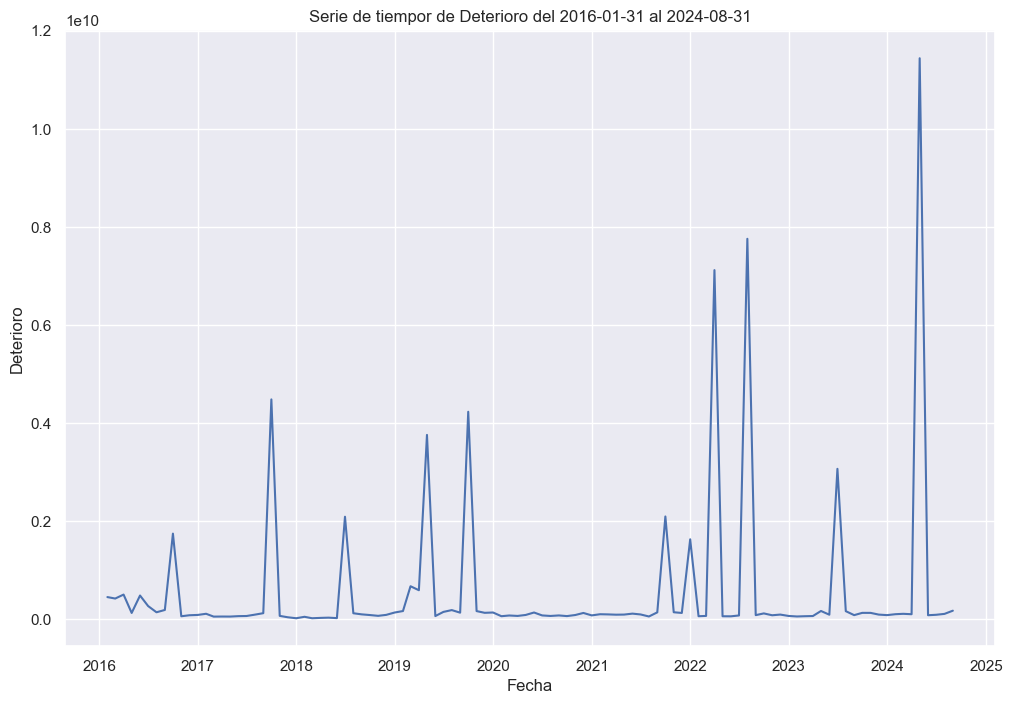

In [66]:
serie_de_tiempo(df_gasto,'Deterioro')

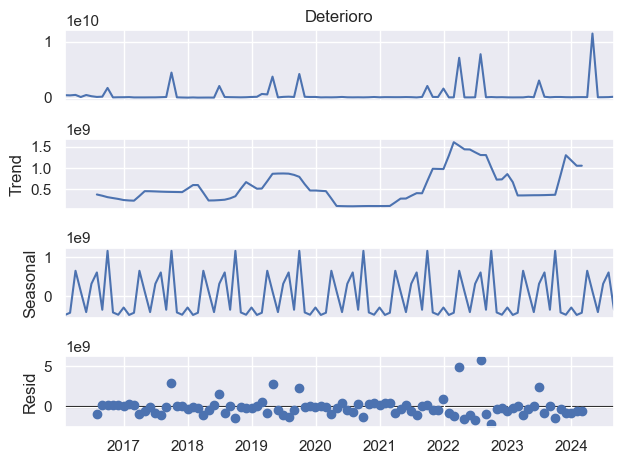

In [67]:
Serie_decompuesta = seasonal_decompose (df_gasto['Deterioro'],model = 'additive', period= 12)
grafico1 = Serie_decompuesta.plot()

In [68]:
df_gasto['log_Deterioro'] = np.log10(df_gasto['Deterioro'])
df_gasto.describe()

,Deterioro,log_Deterioro
count,1.040000e+02,104.000000
mean,5.898848e+08,8.175024
std,1.662141e+09,0.550004
min,2.466401e+07,7.392064
25%,7.217045e+07,7.858359
50%,1.008496e+08,8.003640
75%,1.487325e+08,8.172312
max,1.144116e+10,10.058470


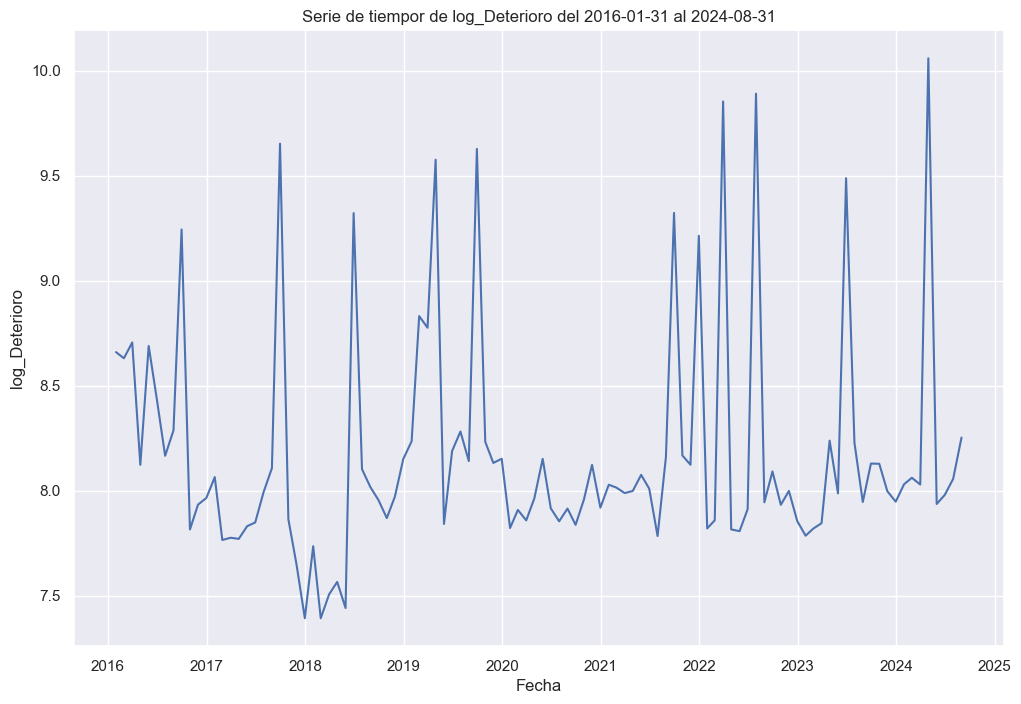

In [69]:
serie_de_tiempo(df_gasto,'log_Deterioro')

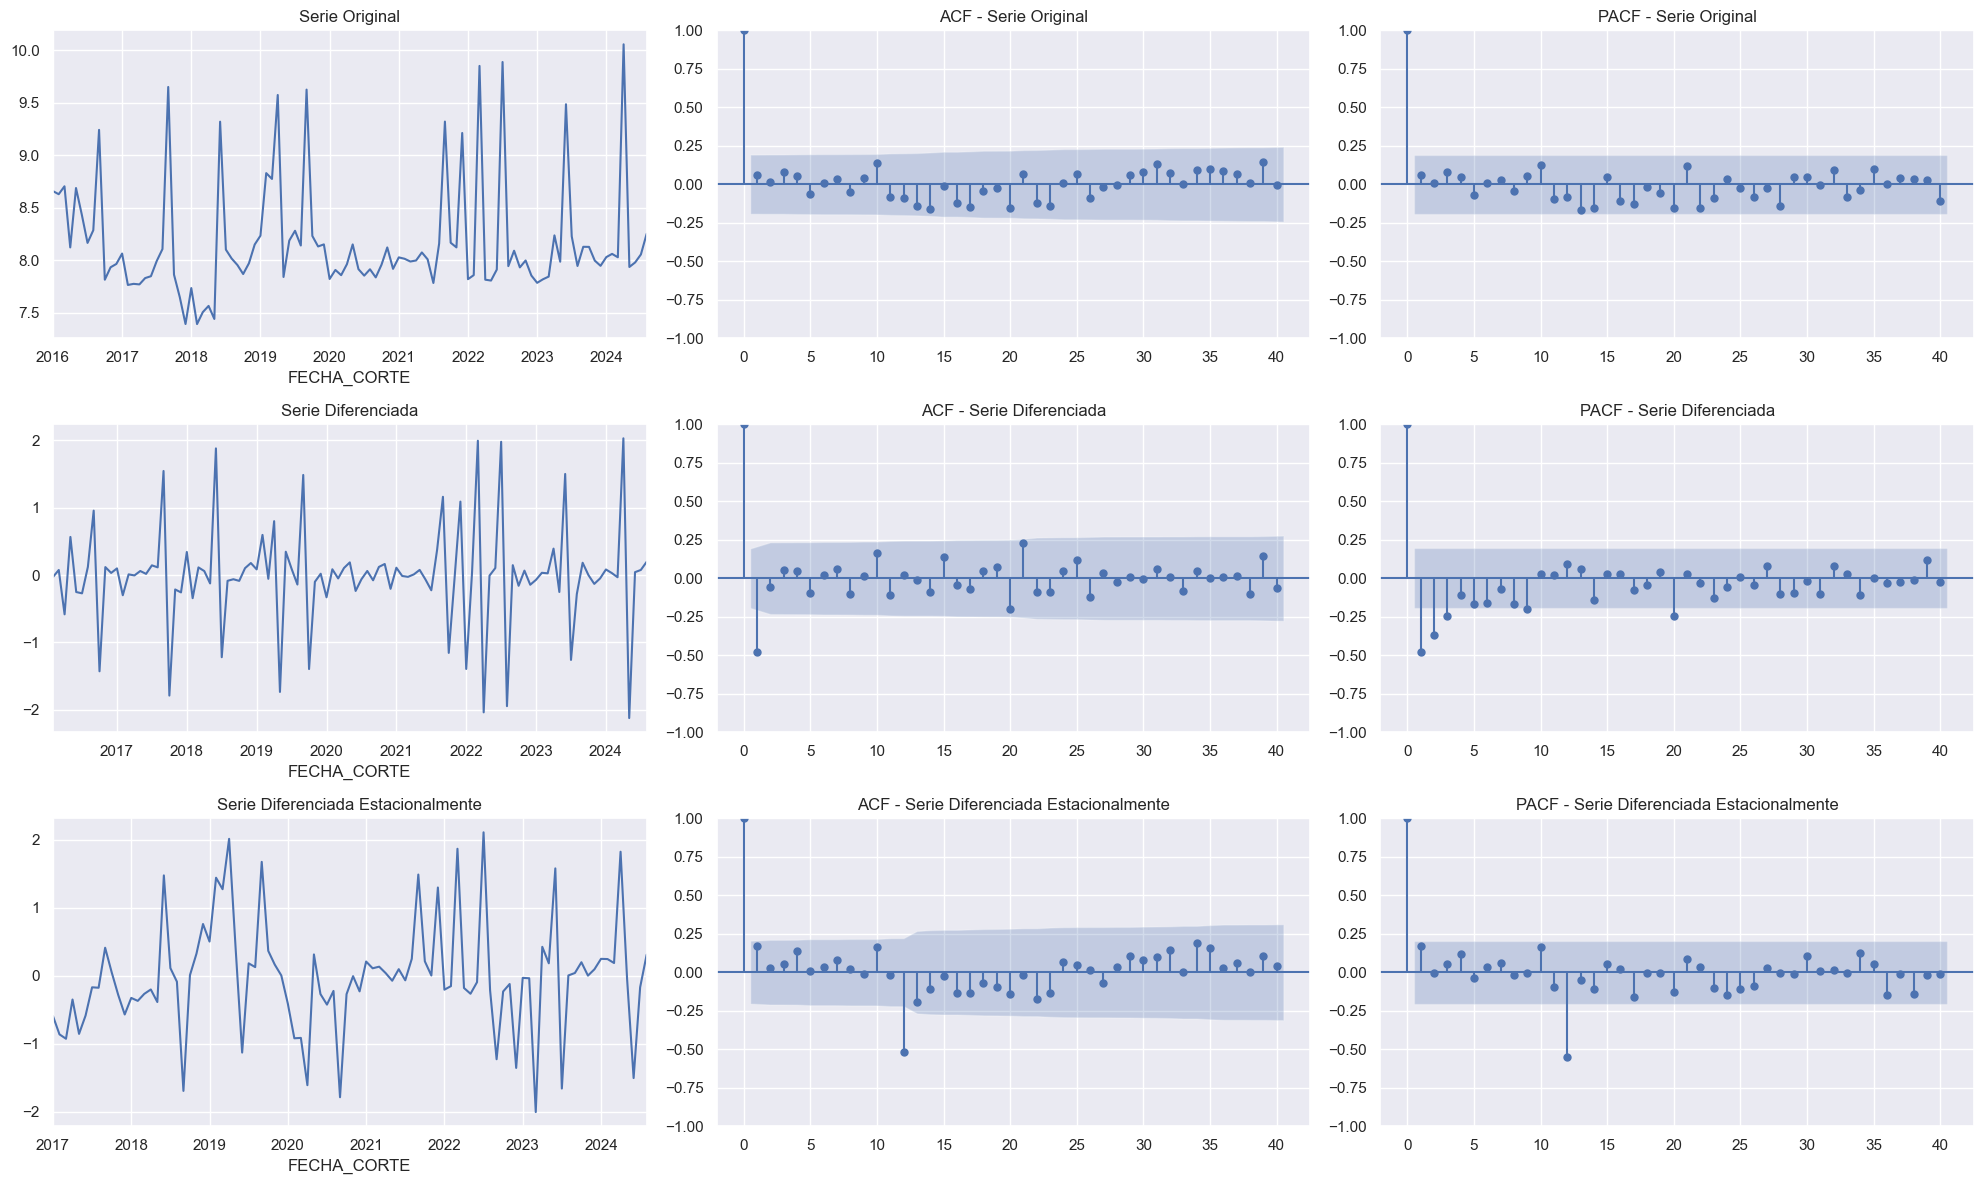

In [70]:
plot_time_series_analysis(df_gasto,'log_Deterioro')

In [71]:
df_gasto['Deterioro'] = df_gasto['log_Deterioro']
df_gasto= df_gasto.drop(columns=['log_Deterioro'])
df_gasto.describe()

,Deterioro
count,104.000000
mean,8.175024
std,0.550004
min,7.392064
25%,7.858359
50%,8.003640
75%,8.172312
max,10.058470


## Analisis Exploratorio de los Datos



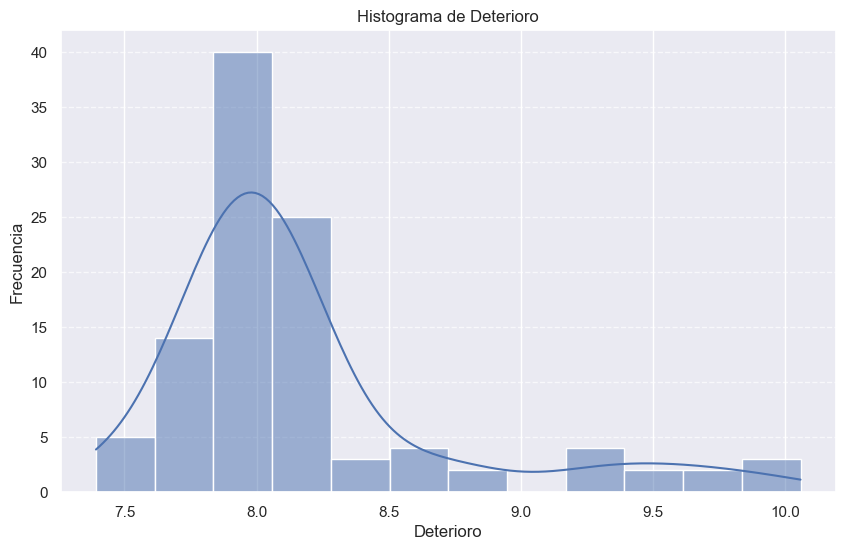

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gasto['Deterioro'], bins=12, kde=True)
plt.title('Histograma de Deterioro')
plt.xlabel('Deterioro')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

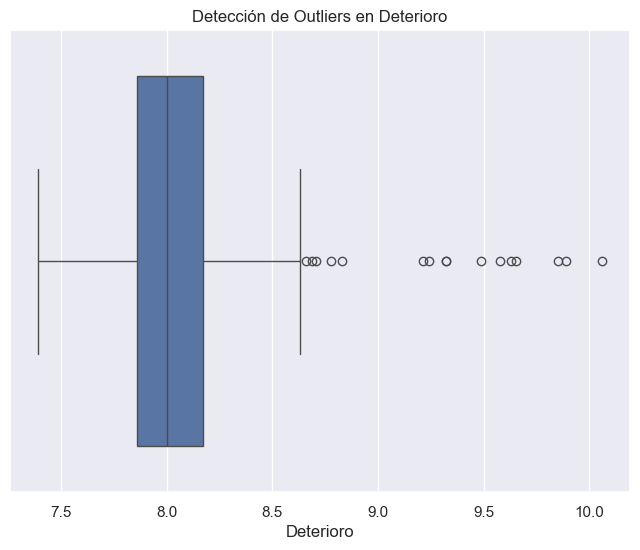

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_gasto['Deterioro'])
plt.title('Detección de Outliers en Deterioro')
plt.show()

In [74]:
print(df_gasto['Deterioro'].describe())

count    104.000000
mean       8.175024
std        0.550004
min        7.392064
25%        7.858359
50%        8.003640
75%        8.172312
max       10.058470
Name: Deterioro, dtype: float64


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


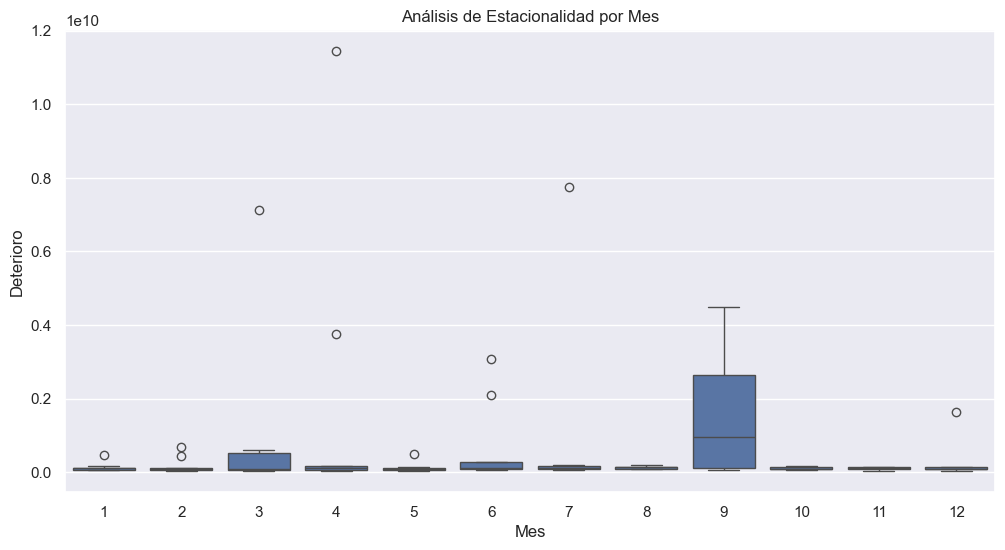

In [75]:
df['Mes'] = df_gasto.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes', y='Deterioro', data=df)
plt.title('Análisis de Estacionalidad por Mes')
plt.xlabel('Mes')
plt.ylabel('Deterioro')
plt.show()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins


## Identificación

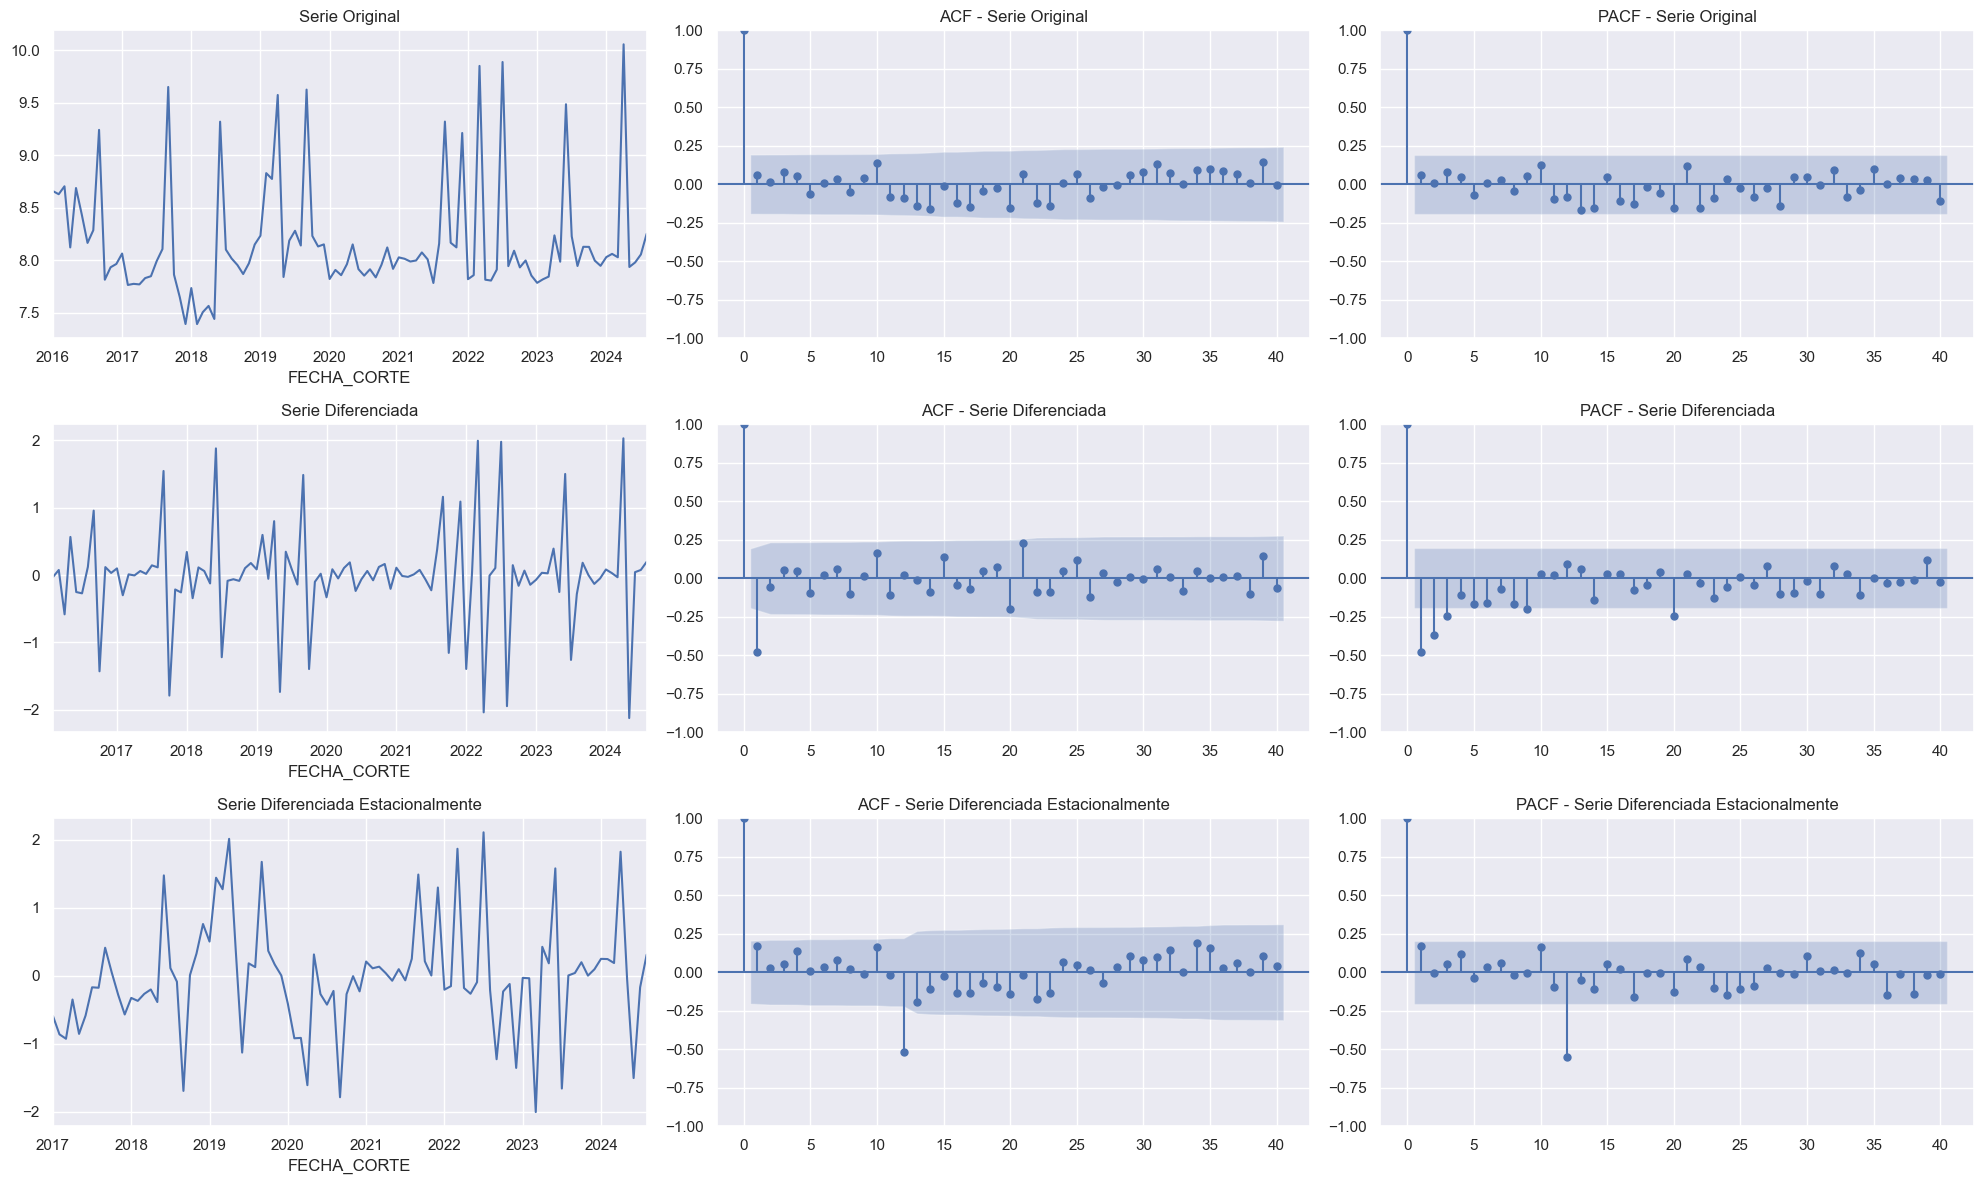

In [76]:
plot_time_series_analysis(df_gasto,'Deterioro')

In [77]:
# prueba de Dickey Fuller para las series
SerieOriginal_adf = adfuller(df_gasto['Deterioro'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -9.514616296537794
p-value: 3.1816883598357e-16
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


In [78]:
SerieDiferenciada_adf = adfuller(df_gasto['Deterioro'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -6.012506605752662
p-value: 1.5613155425683234e-07
Critical Values:
	1%: -3.5019123847798657
	5%: -2.892815255482889
	10%: -2.583453861475781


In [79]:
SerieDiferenciadaEst_adf = adfuller(df_gasto['Deterioro'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.0401740270053175
p-value: 0.0012141581662072005
Critical Values:
	1%: -3.5148692050781247
	5%: -2.8984085156250003
	10%: -2.58643890625


In [80]:
Entrenamiento_df= df_gasto[:98]
Prueba_df= df_gasto[98:]

display(Prueba_df,Entrenamiento_df)

,Deterioro
FECHA_CORTE,
2024-03-31,8.028687
2024-04-30,10.058470
2024-05-31,7.936171
2024-06-30,7.979451
2024-07-31,8.055558
2024-08-31,8.252405


,Deterioro
FECHA_CORTE,
2016-01-31,8.659167
2016-02-29,8.629858
2016-03-31,8.705258
2016-04-30,8.122614
2016-05-31,8.688586
...,...
2023-10-31,8.127657
2023-11-30,7.996787
2023-12-31,7.947172


In [81]:
modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='bic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=252.031, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=200.499, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=inf, Time=1.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=238.221, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : BIC=199.463, Time=1.44 sec
 ARIMA(1,1,0)(3,1,0)[12]             : BIC=201.629, Time=1.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : BIC=200.104, Time=1.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=195.663, Time=0.98 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(1,1,2)[12]             : BIC=inf, Time=4.46 sec
 ARIMA(1,1,0)(0,1,2)[12]             : BIC=195.587, Time=0.79 sec
 ARIMA(1,1,0)(0,1,3)[12]             : BIC=199.995, Time=1.11 sec
 ARIMA(1,1,0)(1,1,3)[12]             : BIC=204.439, Time=2.67 sec
 ARIMA(0,1,0)(0,1,2)[12]             : BIC=211.585, Time=0.81 sec
 ARIMA(2,1,0)(0,1,2)[12]             : BIC=19

In [82]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -79.542
Date:                              Fri, 29 Nov 2024   AIC                            171.084
Time:                                      09:40:56   BIC                            185.740
Sample:                                  01-31-2016   HQIC                           176.979
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7112      0.107     -6.618      0.000      -0.922      -0.501
ar.L2         -0.5287      0.113     -4.695      0.000      -0.749      -0.308
ar.L3         -0.3405      0.086     -3.962      0.000      -0.509      -0.172
ar.S.L12      -0.2259      0.203     -1.113      0.266      -0.624       0.172
ma.S.L12      -0.8643      0.416     -2.078      0.038      -1.680      -0.049
sigma2         0.2979      0.089      3.350      0.001       0.124       0.472
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.70   Prob(JB):                         0.03
Heteroskedasticity (H):               1.42   Skew:                             0.48
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicción


In [83]:
modelo_SM = SARIMAX(Entrenamiento_df,order=(3,1,0),seasonal=(1,1,1,12),freq="ME",enforce_stationarity=False,enforce_invertibility=False)
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Deterioro   No. Observations:                   98
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 -81.259
Date:                Fri, 29 Nov 2024   AIC                            170.518
Time:                        09:40:56   BIC                            180.691
Sample:                    01-31-2016   HQIC                           174.627
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7384      0.107     -6.870      0.000      -0.949      -0.528
ar.L2         -0.5318      0.103     -5.144      0.000      -0.734      -0.329
ar.L3         -0.2389      0.082     -2.926      0.003      -0.399      -0.079
sigma2         0.3299      0.034      9.760      0.000       0.264       0.396
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                53.73
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             1.45
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=6).predicted_mean
print ( Pr_stmodels)

2024-03-31    8.005944
2024-04-30    8.010372
2024-05-31    8.029004
2024-06-30    8.026028
2024-07-31    8.017260
2024-08-31    8.020865
Freq: ME, Name: predicted_mean, dtype: float64


In [85]:
modelo_SK = Sarimax(order=(3,1,0),seasonal_order=(1,1,1,12),freq='ME')
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Deterioro   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -79.542
Date:                              Fri, 29 Nov 2024   AIC                            171.084
Time:                                      09:40:57   BIC                            185.740
Sample:                                  01-31-2016   HQIC                           176.979
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7112      0.107     -6.618      0.000      -0.922      -0.501
ar.L2         -0.5287      0.113     -4.695      0.000      -0.749      -0.308
ar.L3         -0.3405      0.086     -3.962      0.000      -0.509      -0.172
ar.S.L12      -0.2259      0.203     -1.113      0.266      -0.624       0.172
ma.S.L12      -0.8643      0.416     -2.078      0.038      -1.680      -0.049
sigma2         0.2979      0.089      3.350      0.001       0.124       0.472
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.70   Prob(JB):                         0.03
Heteroskedasticity (H):               1.42   Skew:                             0.48
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
Pr_skforecast = modelo_SK.predict(steps=6)
print(Pr_skforecast)

                pred
2024-03-31  8.361568
2024-04-30  7.984440
2024-05-31  7.908379
2024-06-30  8.088663
2024-07-31  8.296779
2024-08-31  7.998043


In [87]:
modelo_PD = pm.ARIMA(order=(3,1,0),seasonal_order=(1,1,1,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -79.454
Date:                              Fri, 29 Nov 2024   AIC                            172.909
Time:                                      09:41:00   BIC                            190.007
Sample:                                  01-31-2016   HQIC                           179.786
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0109      0.029      0.374      0.708      -0.046       0.068
ar.L1         -0.7120      0.107     -6.682      0.000      -0.921      -0.503
ar.L2         -0.5300      0.112     -4.741      0.000      -0.749      -0.311
ar.L3         -0.3411      0.087     -3.934      0.000      -0.511      -0.171
ar.S.L12      -0.2222      0.203     -1.093      0.275      -0.621       0.176
ma.S.L12      -0.8746      0.464     -1.884      0.060      -1.784       0.035
sigma2         0.2954      0.095      3.104      0.002       0.109       0.482
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 6.62
Prob(Q):                              0.73   Prob(JB):                         0.04
Heteroskedasticity (H):               1.44   Skew:                             0.46
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
Pr_pmdarima = modelo_PD.predict(steps=6)
print(Pr_pmdarima)

2024-03-31    8.394564
2024-04-30    8.040323
2024-05-31    7.974901
2024-06-30    8.170181
2024-07-31    8.391320
2024-08-31    8.118640
2024-09-30    8.894826
2024-10-31    8.077419
2024-11-30    8.104636
2024-12-31    8.235734
Freq: ME, dtype: float64


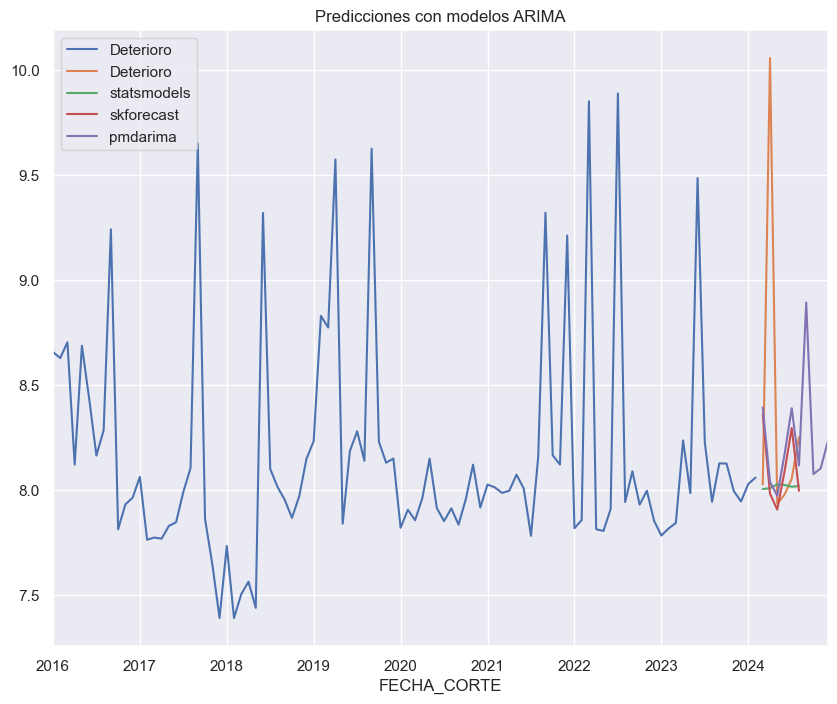

In [89]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

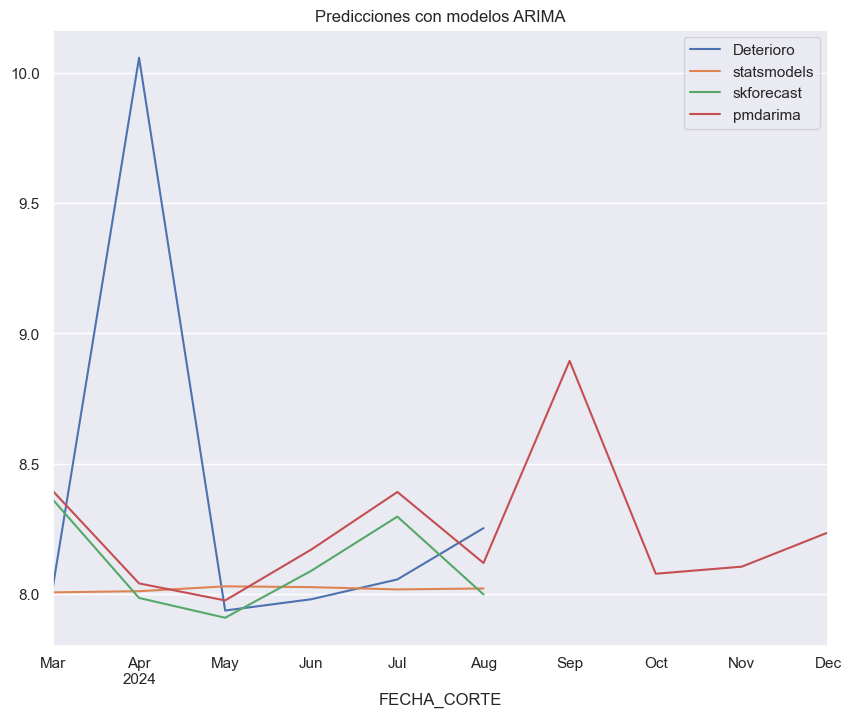

In [90]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [91]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_skforecast)*100:.2f}%")

MAE 0.51
MSE: 0.76
RMSE: 0.87
MAPE: 5.43%


In [92]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_stmodels)*100:.2f}%")

MAE 0.41
MSE: 0.71
RMSE: 0.84
MAPE: 4.28%


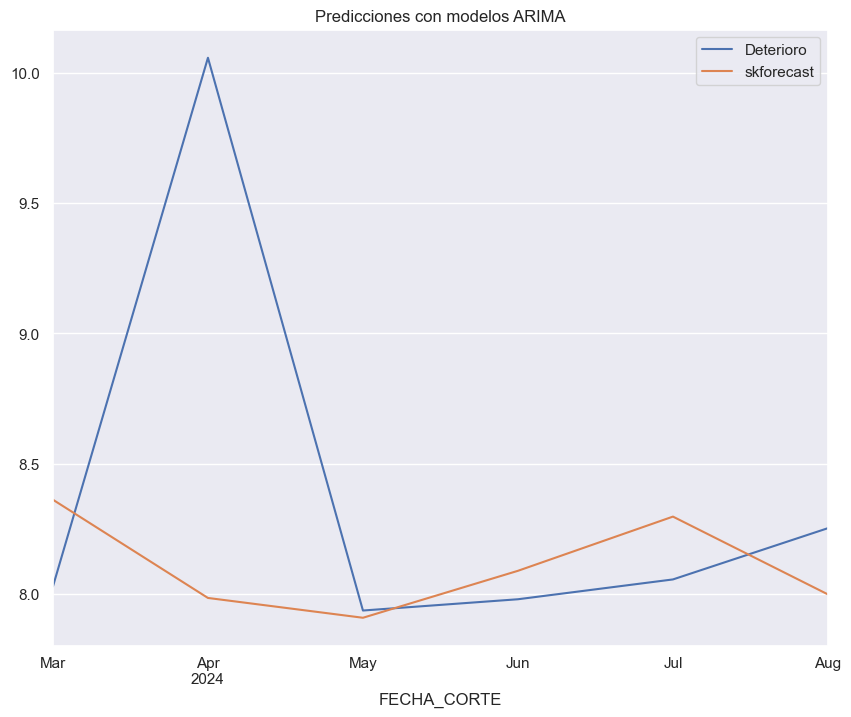

In [93]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='FECHA_CORTE'>

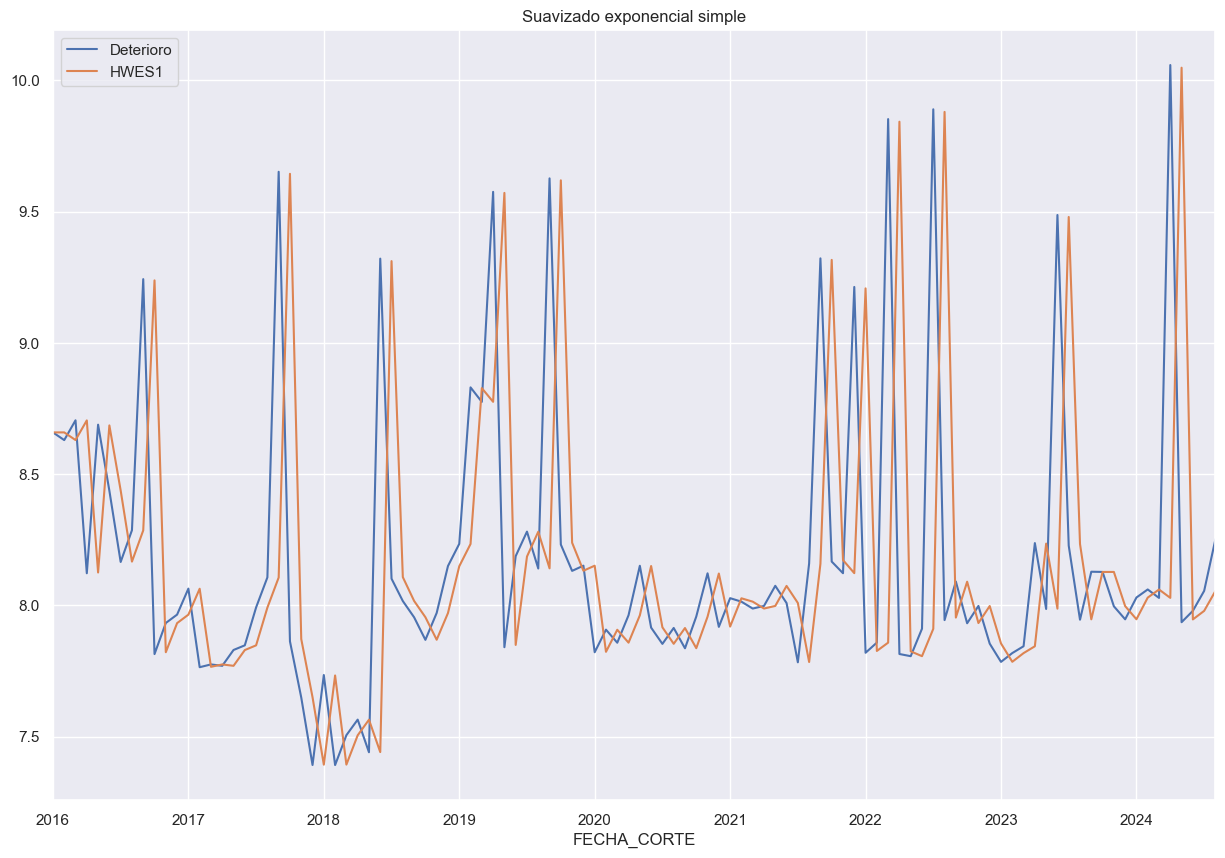

In [94]:
df_s = df_gasto.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Deterioro']).fit(smoothing_level = 0.995, optimized=False,use_brute=True).fittedvalues
df_s[['Deterioro','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='FECHA_CORTE'>

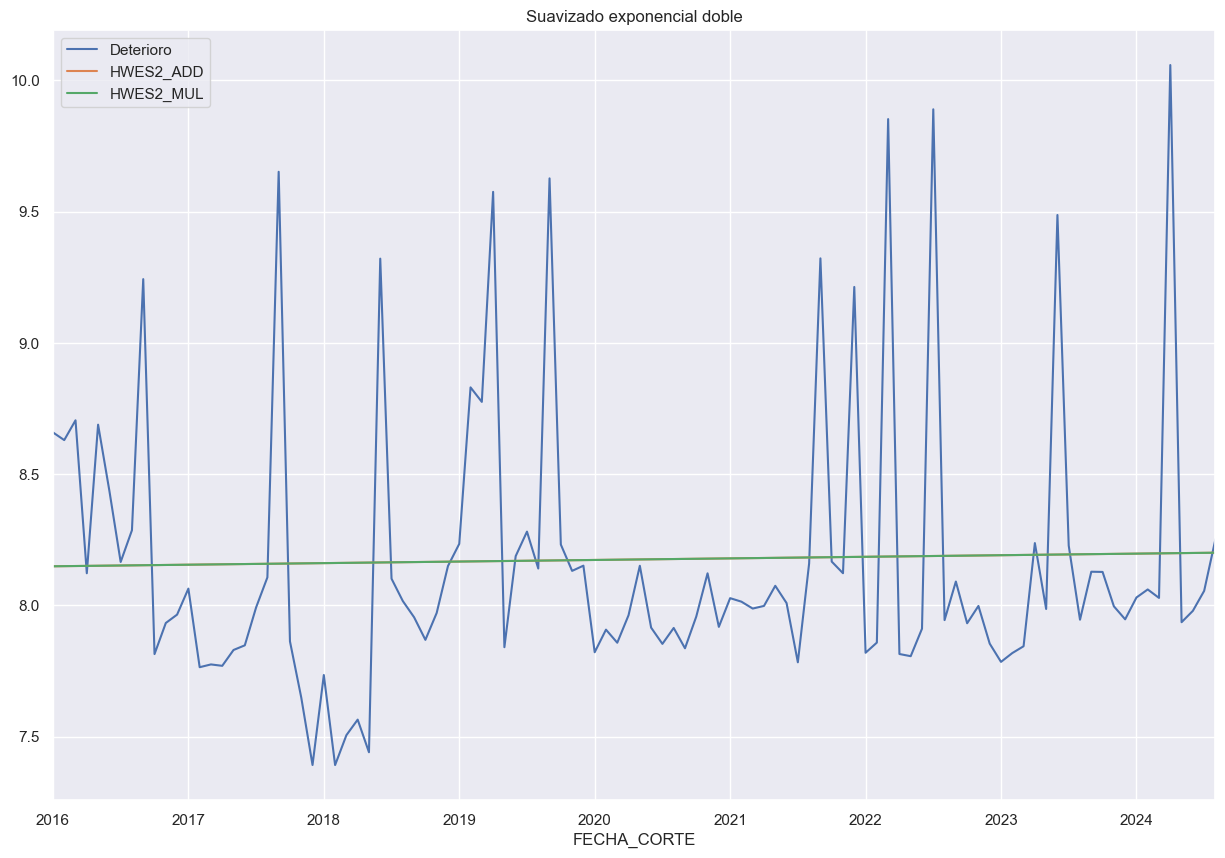

In [95]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul').fit().fittedvalues
df_s[['Deterioro', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='FECHA_CORTE'>

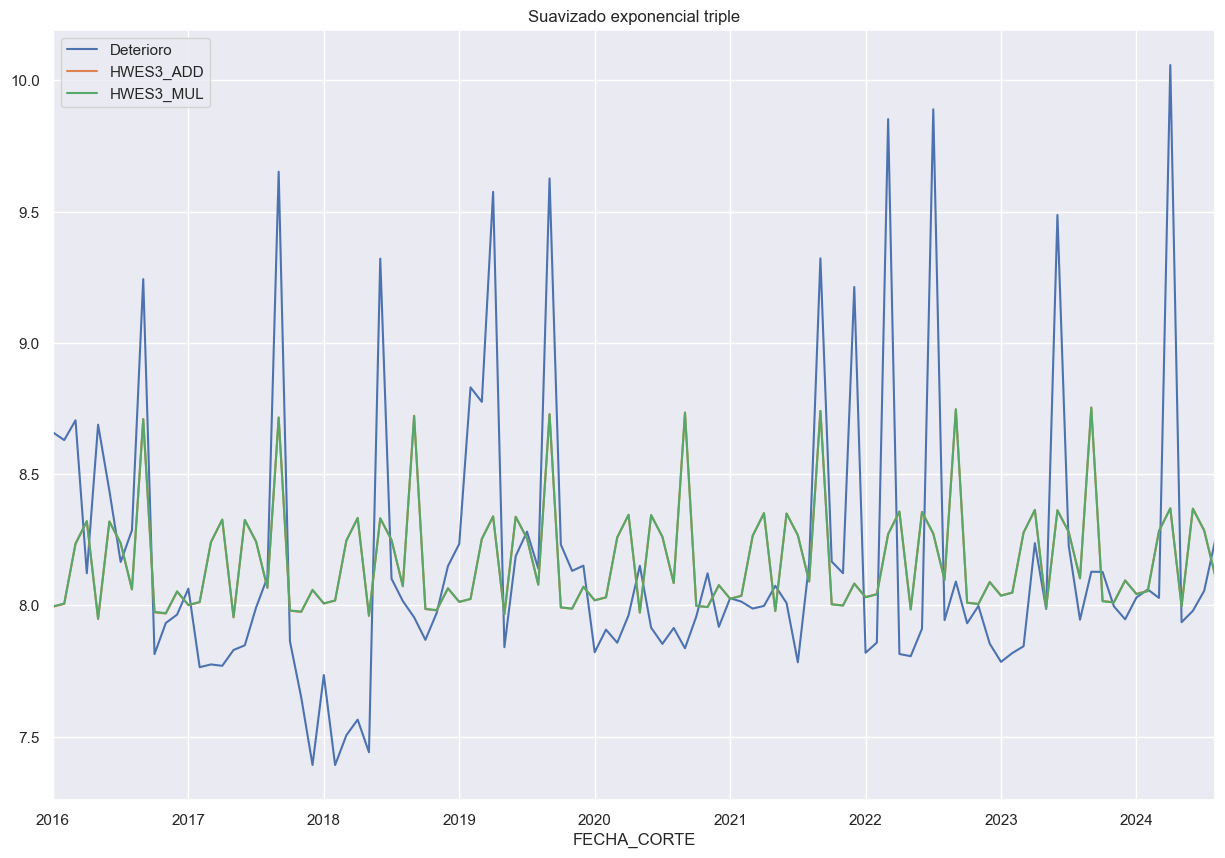

In [96]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Deterioro', 'HWES3_ADD', 'HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [97]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:98]
Prueba_df_s= df_s[98:]

display(Prueba_df_s,Entrenamiento_df_s)

,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2024-03-31,8.028687,8.060772,8.198362,8.198402,8.284168,8.283502
2024-04-30,10.058470,8.028848,8.198864,8.198905,8.369740,8.369991
2024-05-31,7.936171,10.048322,8.199366,8.199409,7.997716,7.995976
2024-06-30,7.979451,7.946732,8.199867,8.199913,8.368939,8.368359
2024-07-31,8.055558,7.979288,8.200369,8.200417,8.286136,8.285591
2024-08-31,8.252405,8.055177,8.200871,8.200921,8.110204,8.108746


,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2016-01-31,8.659167,8.659167,8.149177,8.149179,7.994916,7.996097
2016-02-29,8.629858,8.659167,8.149679,8.149680,8.006040,8.007306
2016-03-31,8.705258,8.630005,8.150181,8.150181,8.234594,8.235417
2016-04-30,8.122614,8.704882,8.150683,8.150682,8.320166,8.321404
2016-05-31,8.688586,8.125525,8.151185,8.151183,7.948142,7.949561
...,...,...,...,...,...,...
2023-10-31,8.127657,8.127547,8.195852,8.195883,8.017078,8.015898
2023-11-30,7.996787,8.127656,8.196354,8.196387,8.012382,8.011215
2023-12-31,7.947172,7.997442,8.196856,8.196890,8.095686,8.094819


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


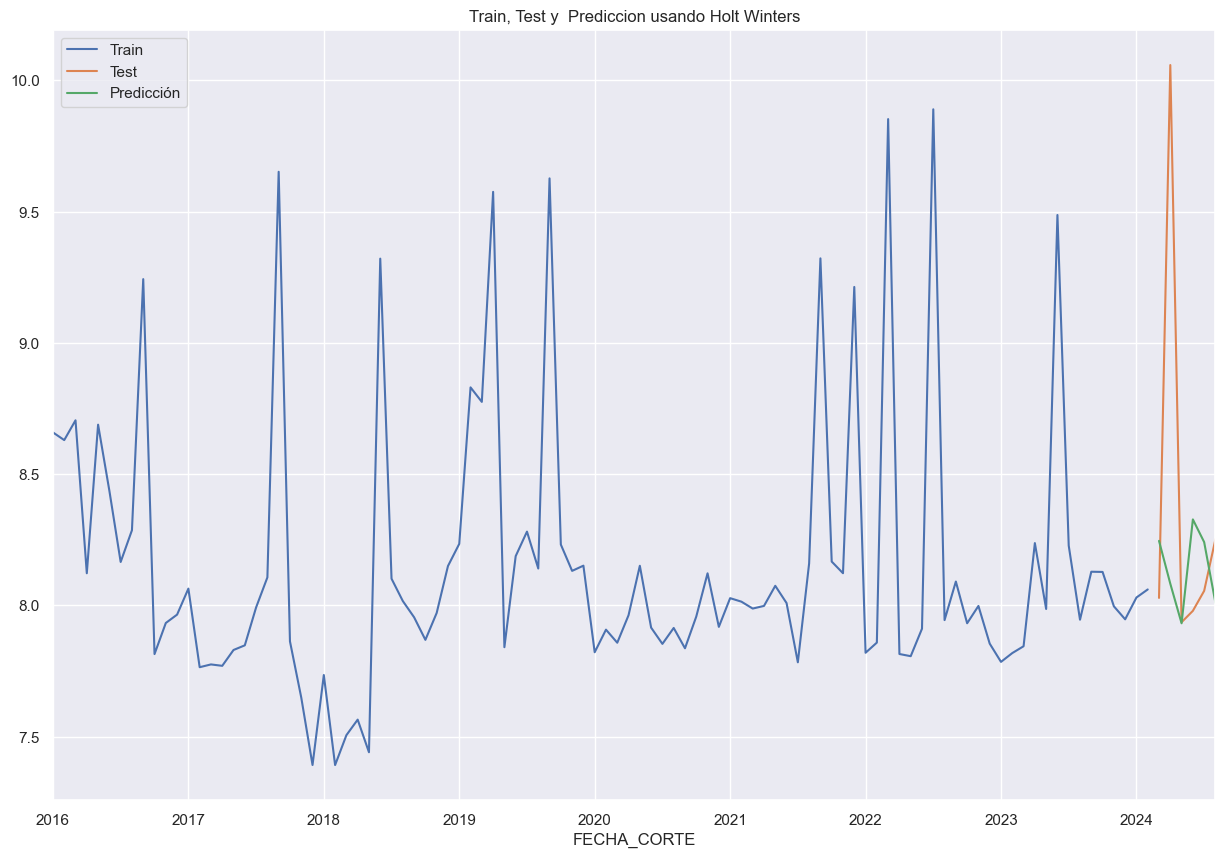

In [98]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Deterioro"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(6)
Entrenamiento_df_s["Deterioro"].plot(legend=True,label="Train")
Prueba_df_s["Deterioro"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='FECHA_CORTE'>

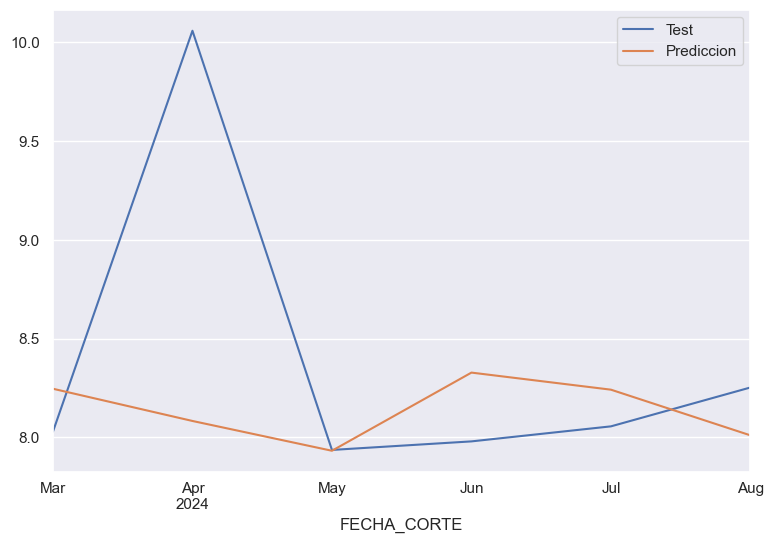

In [99]:
Prueba_df_s['Deterioro'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [100]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Deterioro"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Deterioro'], test_predictions)*100:.2f}%")

MAE 0.50
MSE: 0.69
RMSE: 0.83
MAPE: 5.33%


# Prophet

In [101]:
df_p = df_gasto.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'FECHA_CORTE':'ds','Deterioro':'y'}, inplace=True)
df_p

,ds,y
0,2016-01-31,8.659167
1,2016-02-29,8.629858
2,2016-03-31,8.705258
3,2016-04-30,8.122614
4,2016-05-31,8.688586
...,...,...
99,2024-04-30,10.058470
100,2024-05-31,7.936171
101,2024-06-30,7.979451
102,2024-07-31,8.055558


In [102]:
Entrenamiento_df_p= df_p[:98]
Prueba_df_p= df_p[98:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
93,2023-10-31,8.127657
94,2023-11-30,7.996787
95,2023-12-31,7.947172
96,2024-01-31,8.030218
97,2024-02-29,8.060927


,ds,y
99,2024-04-30,10.058470
100,2024-05-31,7.936171
101,2024-06-30,7.979451
102,2024-07-31,8.055558
103,2024-08-31,8.252405


In [103]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmpjonxp_tp/5z2c1xov.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpjonxp_tp/fodta_q9.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83330', 'data', 'file=/tmp/tmpjonxp_tp/5z2c1xov.json', 'init=/tmp/tmpjonxp_tp/fodta_q9.json', 'output', 'file=/tmp/tmpjonxp_tp/prophet_modelvda_c9li/prophet_model-20241129094109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:09 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
09:41:10 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [104]:
future = modelo.make_future_dataframe(periods=6,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-31,8.079729,7.492593,8.708957
1,2016-02-29,8.122241,7.529900,8.743993
2,2016-03-31,8.287093,7.690798,8.886704
3,2016-04-30,7.923636,7.335421,8.531278
4,2016-05-31,8.415995,7.768326,8.995635
...,...,...,...,...
99,2024-04-01,8.273233,7.675746,8.852112
100,2024-05-01,7.303691,6.674040,7.851291
101,2024-06-01,9.557651,8.987458,10.131463
102,2024-07-01,7.496639,6.919252,8.080598


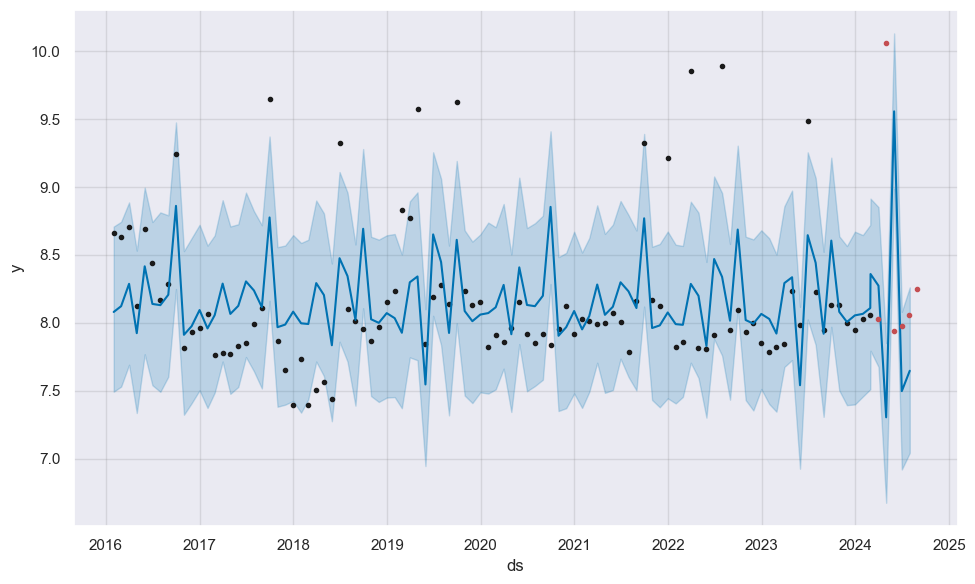

In [105]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

Figure(900x600)


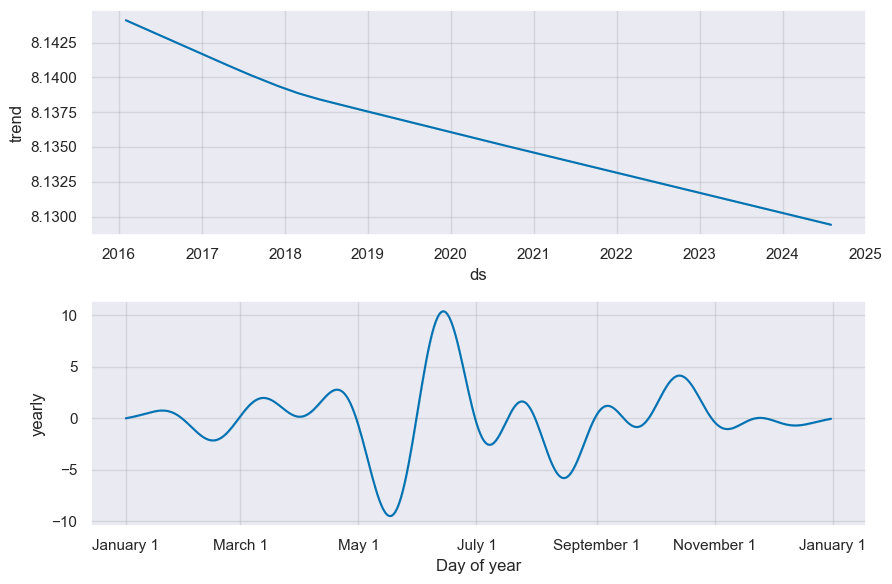

In [106]:
ph_modelo = modelo.plot_components(forecast)
print(ph_modelo)

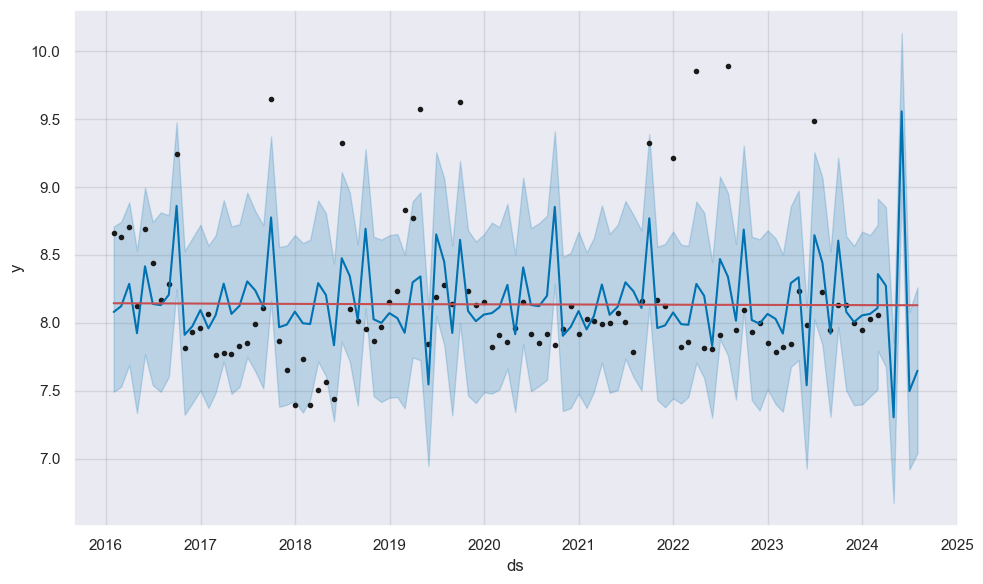

In [107]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

In [108]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv

prophet    INFO  Making 11 forecasts with cutoffs between 2018-03-27 00:00:00 and 2023-03-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

prophet    INFO  n_changepoints greater than number of observations. Using 19.
cmdstanpy  DEBUG input tempfile: /tmp/tmpjonxp_tp/g2uvor3f.json
cmdstanpy  DEBUG input tempfile: /tmp/tmpjonxp_tp/0qa22dc0.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61934', 'data', 'file=/tmp/tmpjonxp_tp/g2uvor3f.json', 'init=/tmp/tmpjonxp_tp/0qa22dc0.json', 'output', 'file=/tmp/tmpjonxp_tp/prophet_modelaonn_nfg/prophet_model-20241129094115.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:41:15 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
09:41:15 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing
prophet    INFO  n_changepoints greater than number of observations. Using 24.
cmdstanpy  DEBUG input tempfile: /tmp/tmpjonxp_tp/95aohen

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-31,7.544780,7.488824,7.603152,7.505785,2018-03-27
1,2018-04-30,7.820995,7.758293,7.886236,7.565072,2018-03-27
2,2018-05-31,7.062213,6.983784,7.135577,7.440799,2018-03-27
3,2018-06-30,7.067467,6.963165,7.163608,9.321031,2018-03-27
4,2018-07-31,7.352230,7.224959,7.476551,8.101899,2018-03-27
...,...,...,...,...,...,...
127,2023-10-31,8.026505,7.481245,8.662848,8.127657,2023-03-01
128,2023-11-30,7.960056,7.328744,8.542508,7.996787,2023-03-01
129,2023-12-31,8.056444,7.441073,8.665581,7.947172,2023-03-01
130,2024-01-31,8.043465,7.435775,8.575430,8.030218,2023-03-01


In [109]:
df_per = performance_metrics(df_p_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,0.985342,0.992644,0.823447,0.096821,0.091865,0.096268,0.230769
1,39 days,1.215410,1.102457,0.953514,0.110318,0.105198,0.111146,0.153846
2,43 days,1.075509,1.037067,0.878207,0.100708,0.091865,0.102552,0.230769
3,45 days,0.930239,0.964489,0.776812,0.089205,0.091188,0.090022,0.307692
4,49 days,0.851898,0.922983,0.705424,0.081931,0.063650,0.082303,0.384615
...,...,...,...,...,...,...,...,...
115,354 days,0.685193,0.827764,0.551719,0.063762,0.044716,0.066727,0.615385
116,358 days,0.675967,0.822172,0.527597,0.060656,0.036181,0.063697,0.615385
117,359 days,0.675542,0.821914,0.526388,0.060502,0.036181,0.063546,0.615385
118,363 days,0.377041,0.614036,0.381715,0.046047,0.033842,0.047388,0.692308


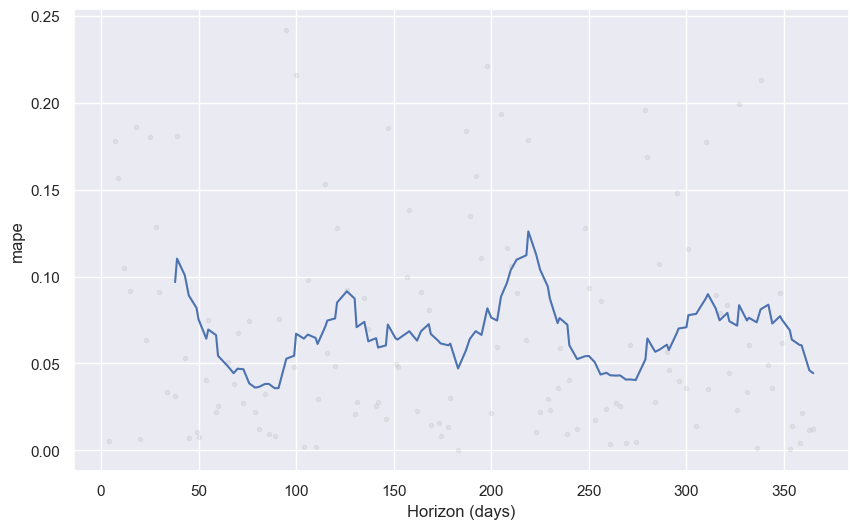

In [110]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')